<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-12 05:05:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.2MB/s    in 2.5s    

2025-09-12 05:05:36 (61.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



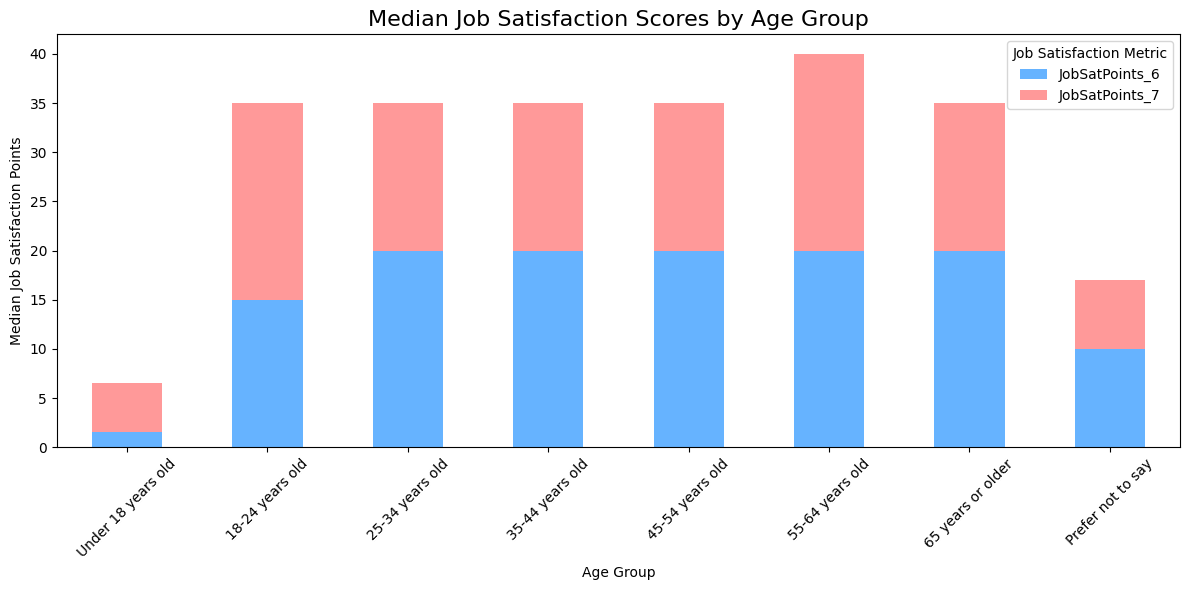

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the relevant columns
QUERY = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Convert columns to numeric if necessary
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 5: Calculate median JobSat points per Age group
median_scores = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Optional: Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
median_scores = median_scores.reindex(age_order)

# Step 6: Plot stacked bar chart
median_scores.plot(kind='bar', stacked=True, figsize=(12,6), color=['#66b3ff', '#ff9999'])
plt.title("Median Job Satisfaction Scores by Age Group", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Points")
plt.xticks(rotation=45)
plt.legend(title="Job Satisfaction Metric")
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


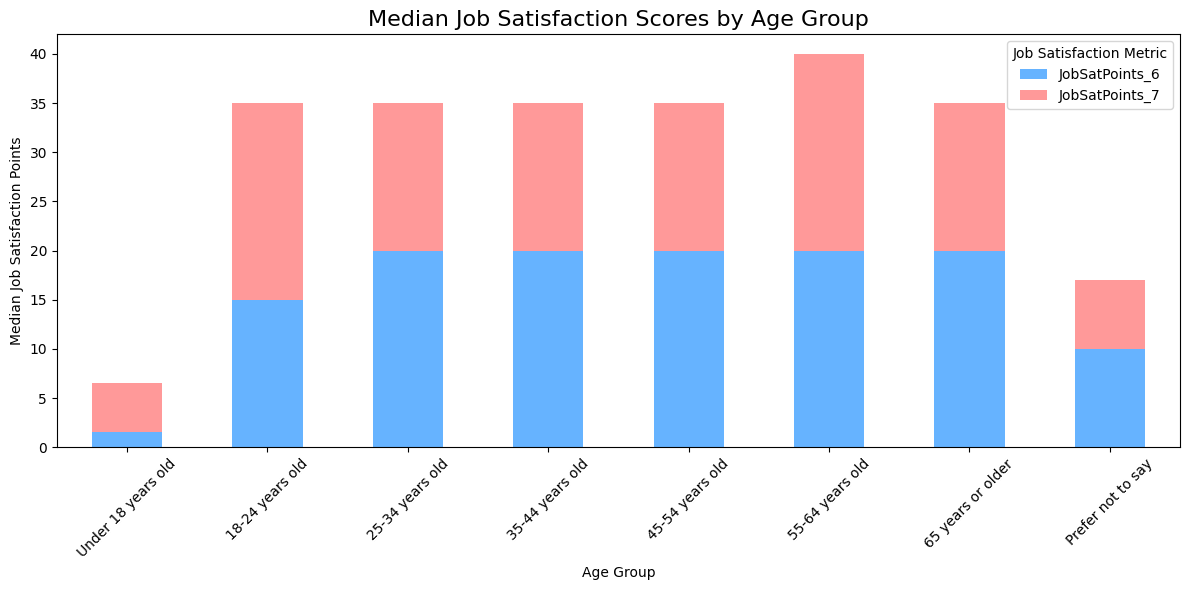

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the relevant columns
QUERY = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Convert columns to numeric if necessary
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 5: Calculate median JobSat points per Age group
median_scores = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Optional: Sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
median_scores = median_scores.reindex(age_order)

# Step 6: Plot stacked bar chart
median_scores.plot(kind='bar', stacked=True, figsize=(12,6), color=['#66b3ff', '#ff9999'])
plt.title("Median Job Satisfaction Scores by Age Group", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Points")
plt.xticks(rotation=45)
plt.legend(title="Job Satisfaction Metric")
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


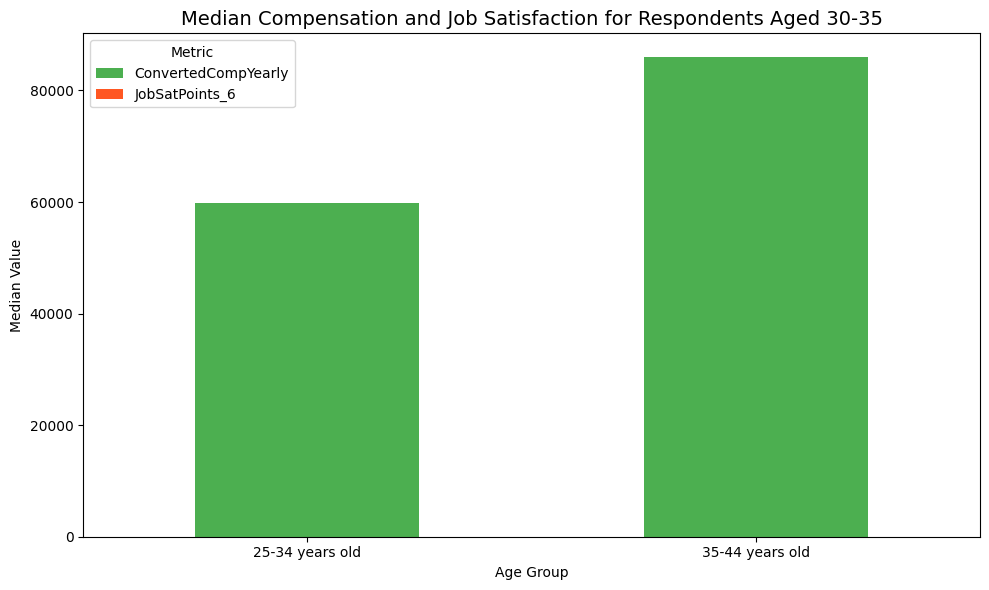

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query relevant columns
QUERY = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 5: Filter for age group 30-35
# Assuming Age column contains ranges like '25-34 years old', '35-44 years old', etc.
# We'll include ages that roughly map to 30-35 range
age_groups = ['25-34 years old', '35-44 years old']
df_filtered = df[df['Age'].isin(age_groups)]

# Step 6: Aggregate median values for stacked chart
median_scores = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 7: Plot stacked bar chart
median_scores.plot(kind='bar', stacked=True, figsize=(10,6), color=['#4CAF50', '#FF5722'])
plt.title("Median Compensation and Job Satisfaction for Respondents Aged 30-35", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Median Value")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


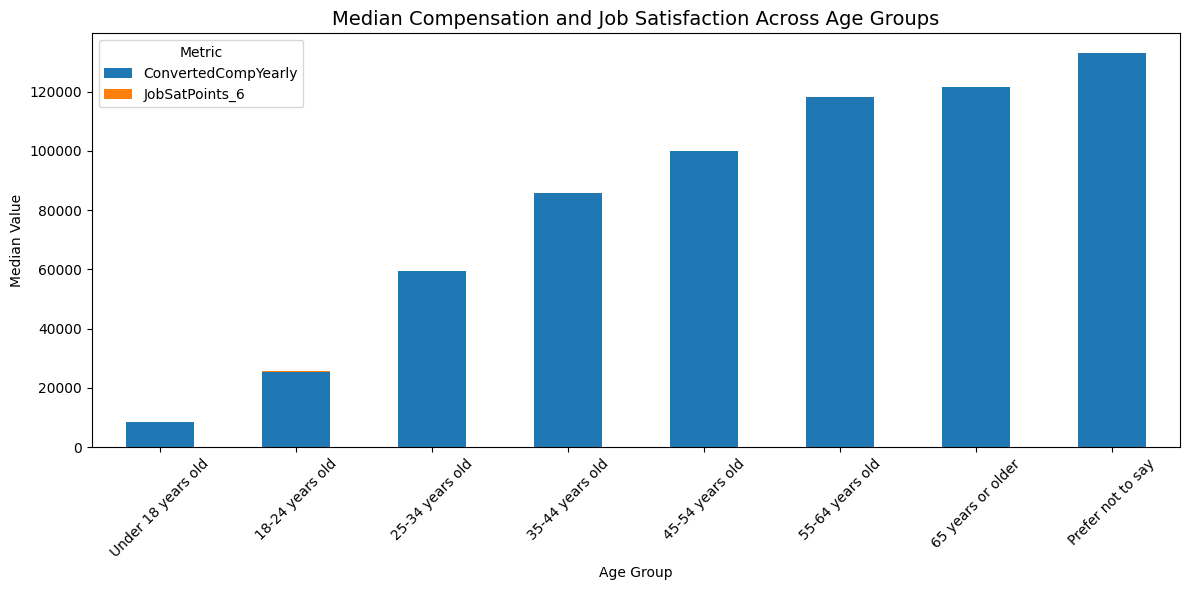

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query relevant columns
QUERY = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 5: Remove unrealistic compensation outliers
df = df[df['ConvertedCompYearly'] <= 500000]  # adjust threshold as needed

# Step 6: Group by Age and calculate median
median_values = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 7: Sort age groups in a meaningful order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
median_values = median_values.reindex(age_order)

# Step 8: Plot stacked bar chart
median_values.plot(kind='bar', stacked=True, figsize=(12,6), color=['#1f77b4', '#ff7f0e'])
plt.title("Median Compensation and Job Satisfaction Across Age Groups", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Median Value")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


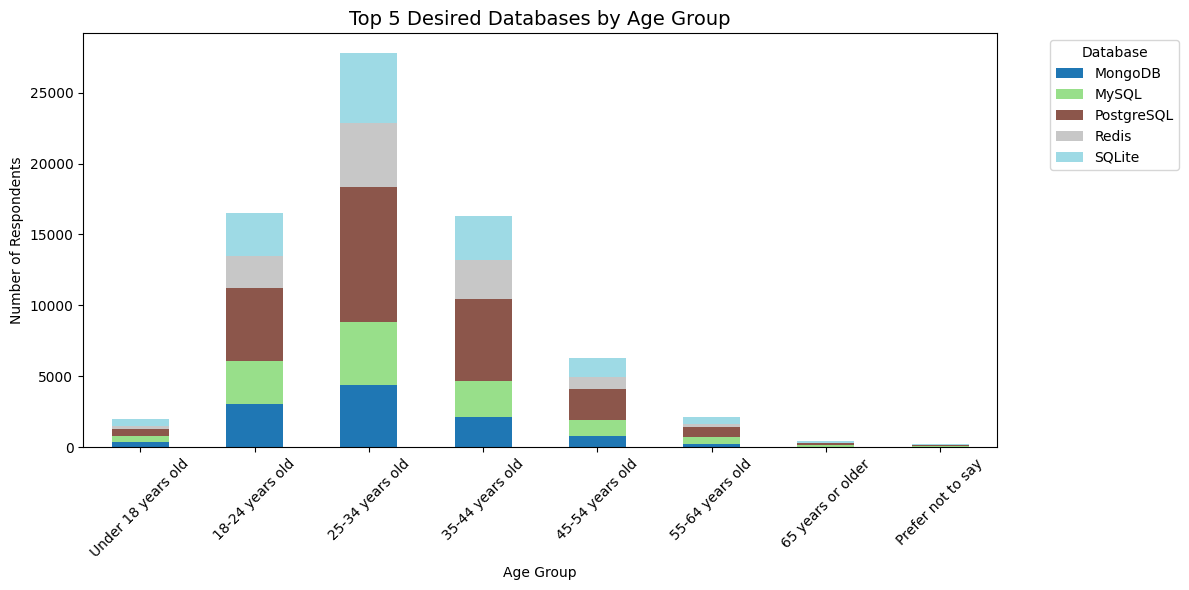

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and DatabaseWantToWorkWith columns
QUERY = """
SELECT Age, DatabaseWantToWorkWith
FROM main
WHERE Age IS NOT NULL AND DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Split multiple databases into separate rows
df = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Step 5: Count top 5 most desired databases
top5_dbs = df['DatabaseWantToWorkWith'].value_counts().head(5).index
df_top5 = df[df['DatabaseWantToWorkWith'].isin(top5_dbs)]

# Step 6: Create a pivot table for stacked chart
pivot_df = df_top5.pivot_table(index='Age', columns='DatabaseWantToWorkWith', aggfunc='size', fill_value=0)

# Step 7: Sort age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
pivot_df = pivot_df.reindex(age_order)

# Step 8: Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Top 5 Desired Databases by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_875/3754421529.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


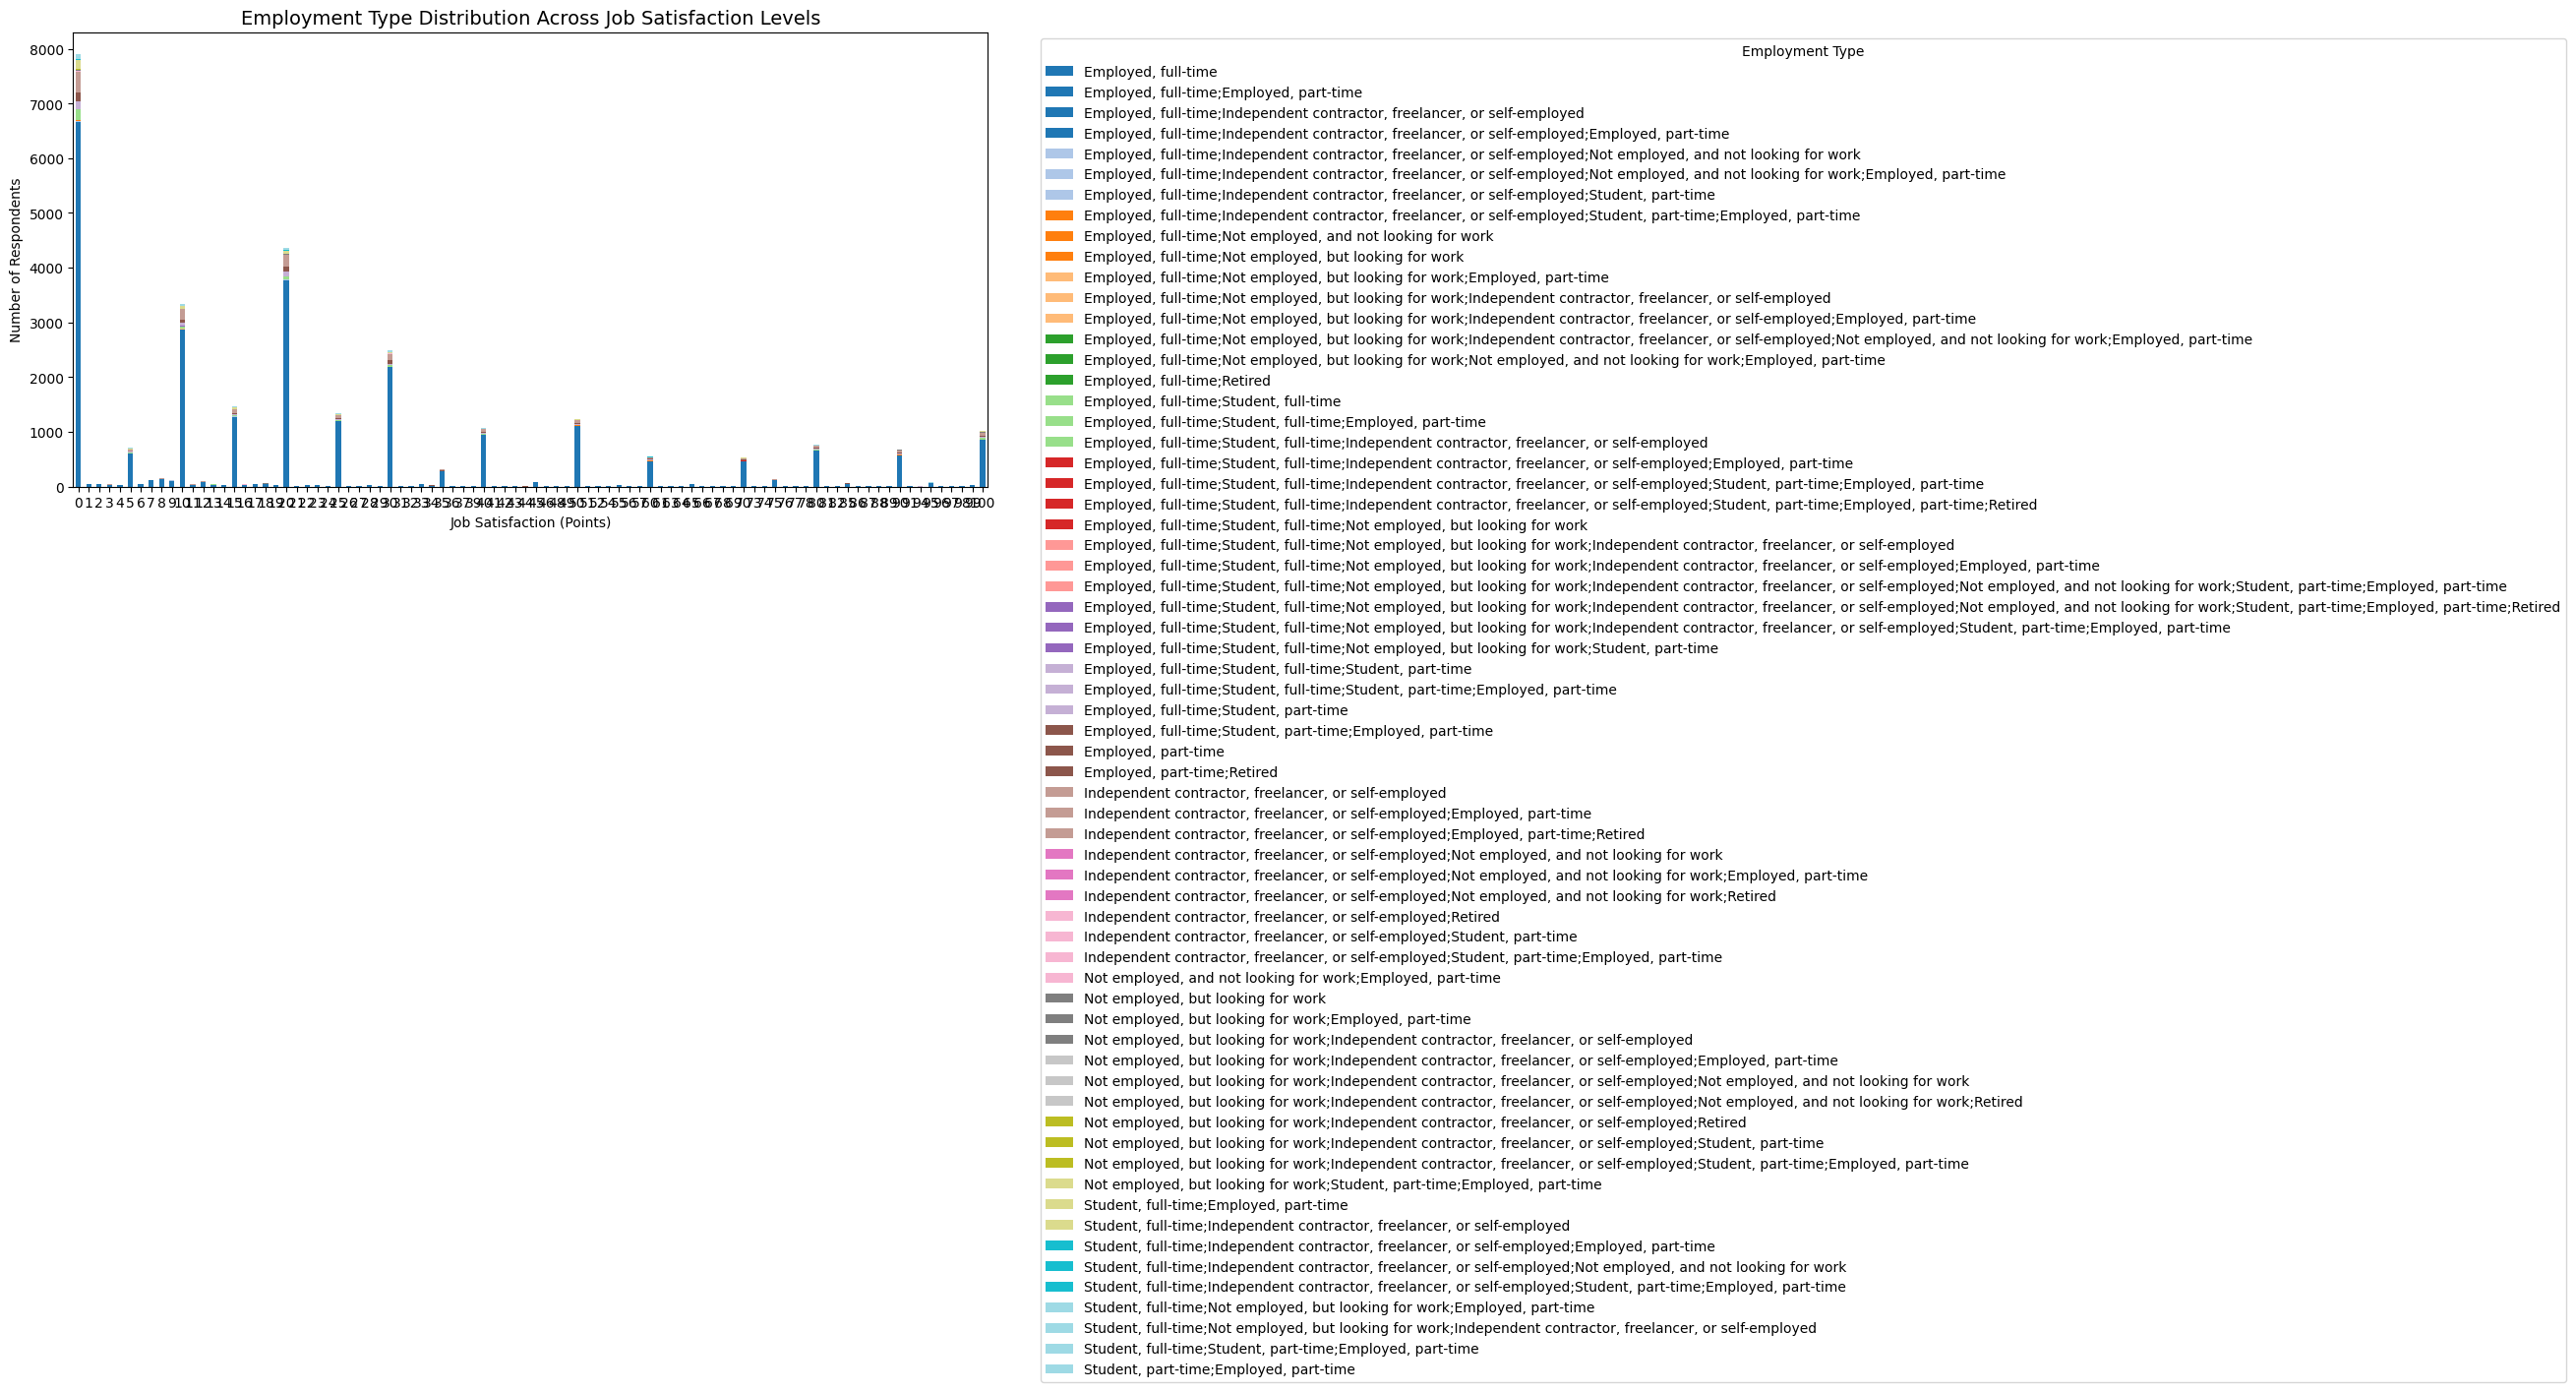

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Employment and JobSatPoints_6 columns
QUERY = """
SELECT Employment, JobSatPoints_6
FROM main
WHERE Employment IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Optional: Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6'])

# Step 5: Convert JobSatPoints_6 to categorical bins if necessary
# Example: rounding to nearest integer
df['JobSatPoints_6'] = df['JobSatPoints_6'].round().astype(int)

# Step 6: Create pivot table for stacked chart
pivot_df = df.pivot_table(index='JobSatPoints_6', columns='Employment', aggfunc='size', fill_value=0)

# Step 7: Sort JobSatPoints_6 (optional)
pivot_df = pivot_df.sort_index()

# Step 8: Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Employment Type Distribution Across Job Satisfaction Levels", fontsize=14)
plt.xlabel("Job Satisfaction (Points)")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [ ]:
##Write your code here

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
